In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df = pd.read_csv('/content/Real_estate.csv')

In [5]:

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Price                                   414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:

df.shape

(414, 8)

In [8]:
df.describe


<bound method NDFrame.describe of       No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4

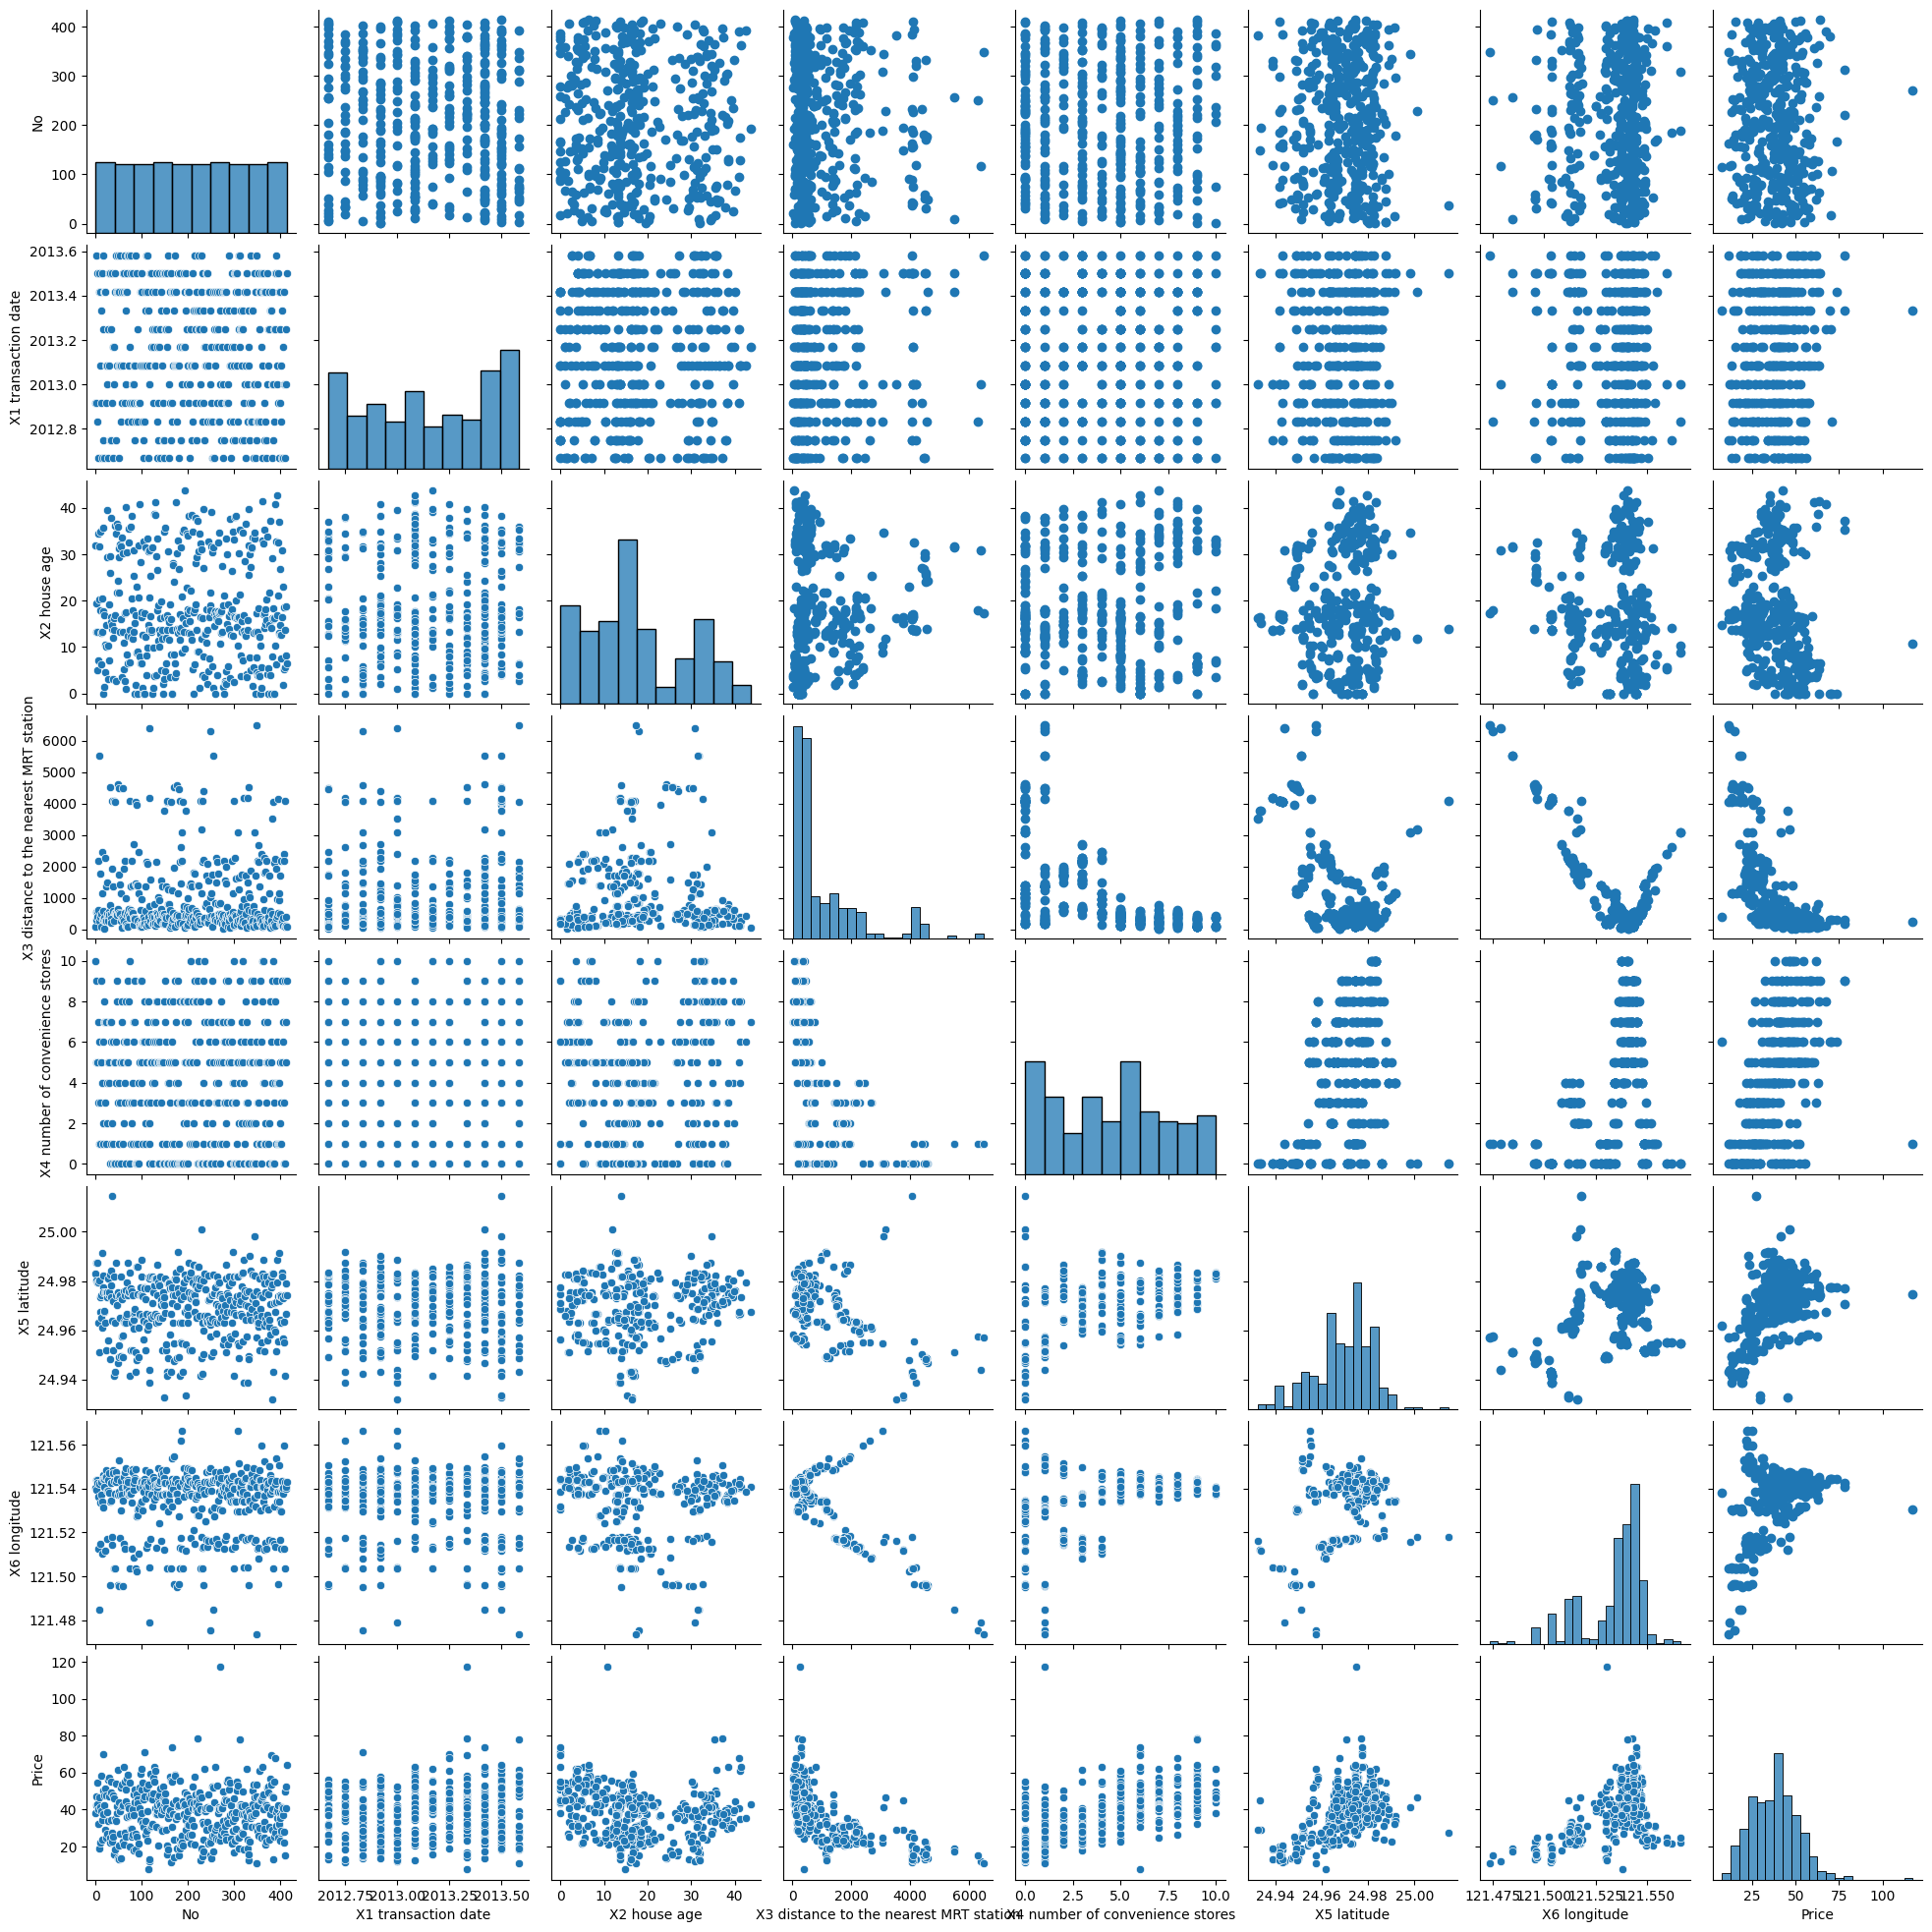

In [9]:

g= sns.pairplot(df)
g.map_upper(plt.scatter)

In [10]:
# find the pairwise correlation of all columns in the dataframe.


df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Price
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

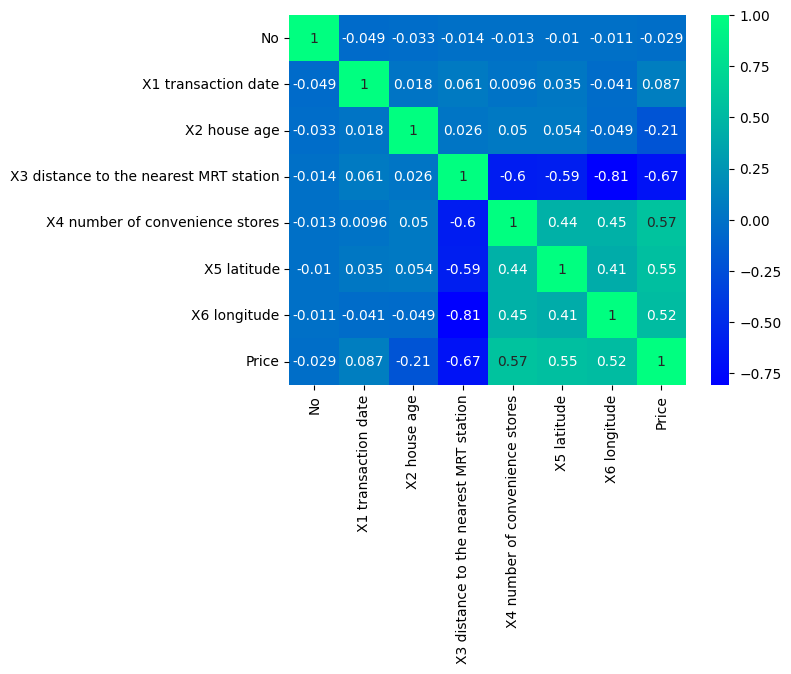

In [11]:
#Heatmap for correlation
sns.heatmap(df.corr(), annot=True,cmap='winter')

Text(0.5, 9.444444444444438, 'Price')

<Figure size 1000x400 with 0 Axes>

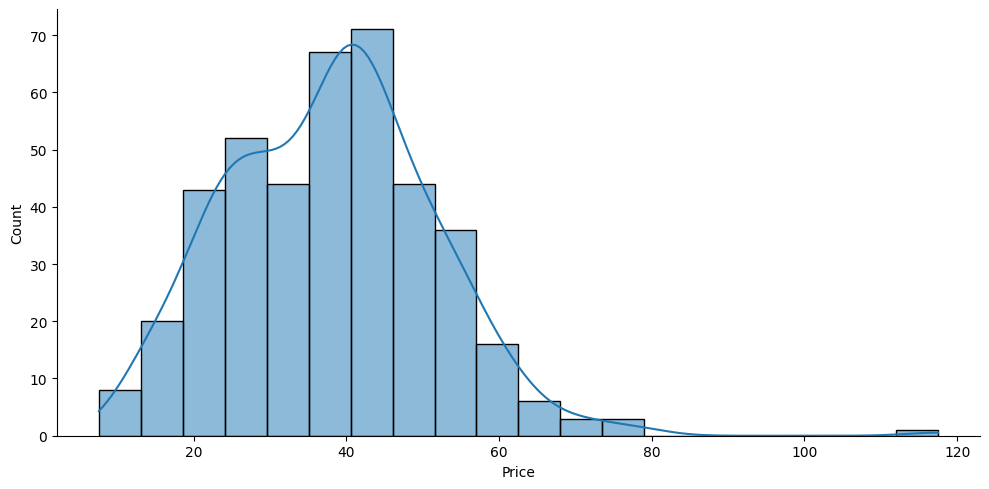

In [16]:
plt.figure(figsize=(10,4))
sns.displot(df['Price'],kde=True,bins=20, aspect=2)
plt.xlabel('Price')

<Axes: xlabel='Price'>

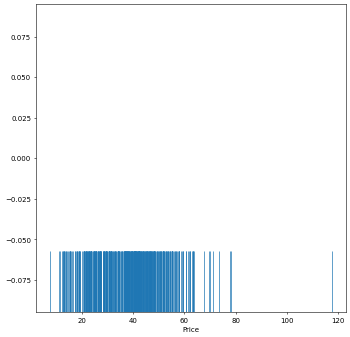

In [17]:
plt.figure(figsize=(8, 8), dpi=50)

sns.rugplot(df['Price'], height=0.2)

<Axes: xlabel='X1 transaction date', ylabel='Price'>

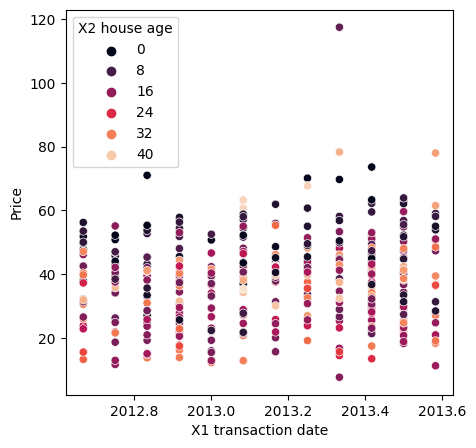

In [19]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Price'], x=df['X1 transaction date'] , hue= 'X2 house age', palette="rocket")

<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Price'>

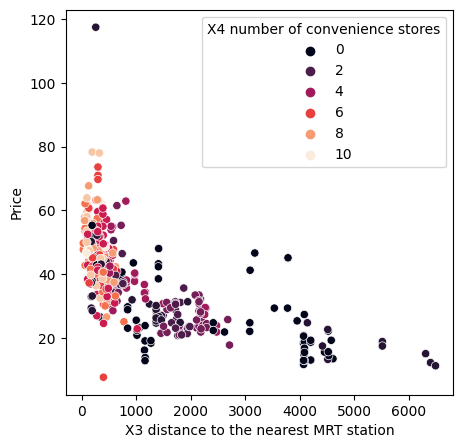

In [20]:

plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Price'], x=df['X3 distance to the nearest MRT station'] , hue= 'X4 number of convenience stores', palette="rocket")

<Axes: xlabel='X5 latitude', ylabel='Price'>

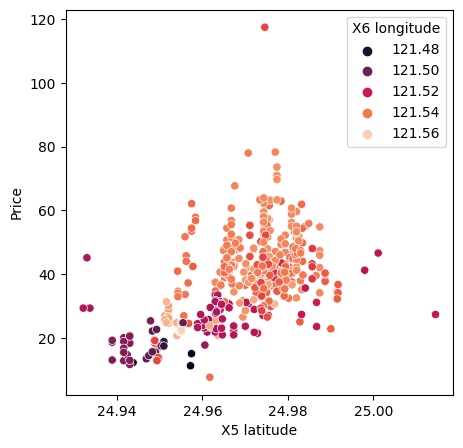

In [21]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Price'], x=df['X5 latitude'] , hue= 'X6 longitude', palette="rocket")

Training a Linear Regression Model


First split up the data into an X array that contains the features to train on, and a y array with the target variable, in this case the (Y house price of unit area) column.


In [23]:
X = df.drop('Price',axis=1)
y = df['Price']

In [24]:
# train out model on the training set and then use the test set to evaluate the model.


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 101)


Training model

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit (X_train, y_train)

LinearRegression()

In [26]:
lin_reg.coef_

pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coedicients'])

,Coedicients
No,-0.002924
X1 transaction date,4.686684
X2 house age,-0.275675
X3 distance to the nearest MRT station,-0.004249
X4 number of convenience stores,1.178325
X5 latitude,240.947692
X6 longitude,18.669459



Test data predictions

In [27]:
y_pred = lin_reg.predict(X_test)


Regression Evaluation Metrics
1-MeanAbsolute Error.
2-Mean Squared Error.
3-R^2


In [28]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.373025
MSE,45.880307
RMSE,6.773500


In [29]:
df['Price'] .mean()

37.980193236714975


Residual plots

In [30]:
test_residuals=y_test - y_pred

Text(0, 0.5, 'Y-Pred')

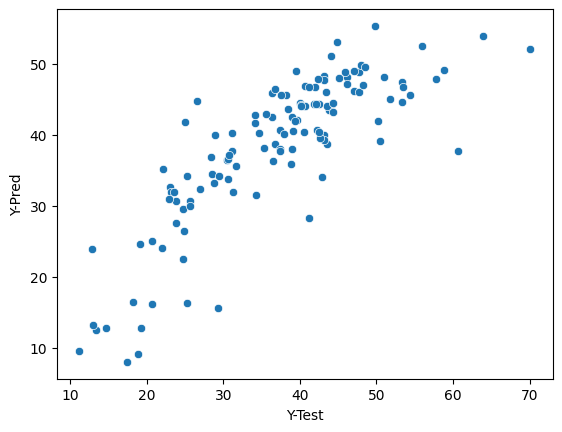

In [31]:

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

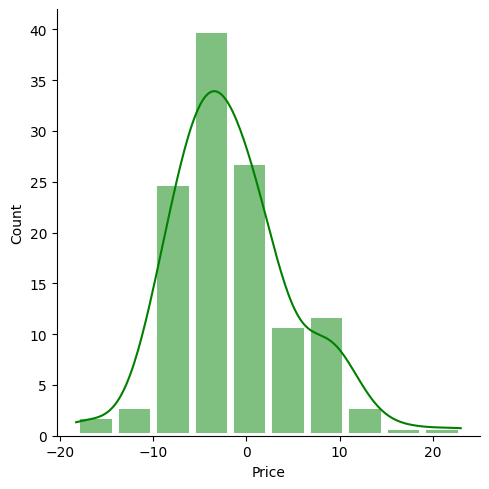

In [32]:

sns.displot(test_residuals, bins=10, kde=True ,color='g', edgecolor='white', linewidth=5)

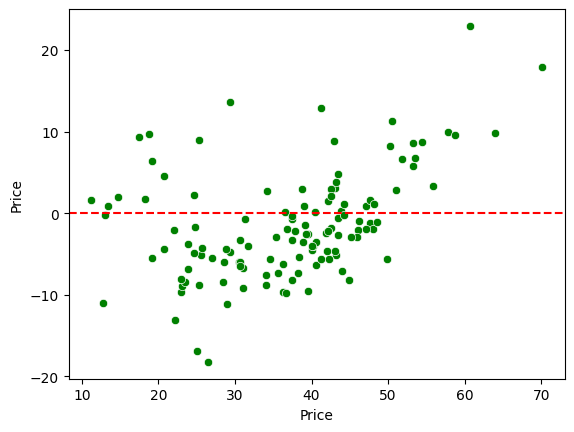

In [33]:
sns.scatterplot(x=y_test, y=test_residuals, color = 'g')
plt.axhline(y=0, color='r', ls='--')
